In [ ]:
import pandas as pd
import numpy as np

visitor = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_visitor_events.csv")
applications = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_applications.csv")
accounts = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_accounts.csv")
transactions = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_transactions.csv")
marketing = pd.read_csv("/Users/gritv/Desktop/projects /data/marketing_source.csv")

print(visitor.shape, applications.shape, accounts.shape, transactions.shape)


(135848, 10) (14074, 10) (4026, 7) (193746, 8)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

bdq_df = pd.read_csv("/Users/gritv/Desktop/projects /data/bdq_report.csv")
bdq_df


,check,num_issues
0,apps_missing_visitor,4
1,accs_missing_application,0
2,tx_missing_account,0
3,bad_credit_score,0
4,negative_income,1
5,invalid_status,0
6,negative_deposit,0
7,bad_kyc_status,0
8,invalid_tx_amount,1
9,marketing_invalid_cost,0


/var/folders/_s/p988zzpj033g3ff1h9gdc8qh0000gn/T/ipykernel_65471/2033407899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bdq_df, x="check", y="num_issues", palette="viridis")


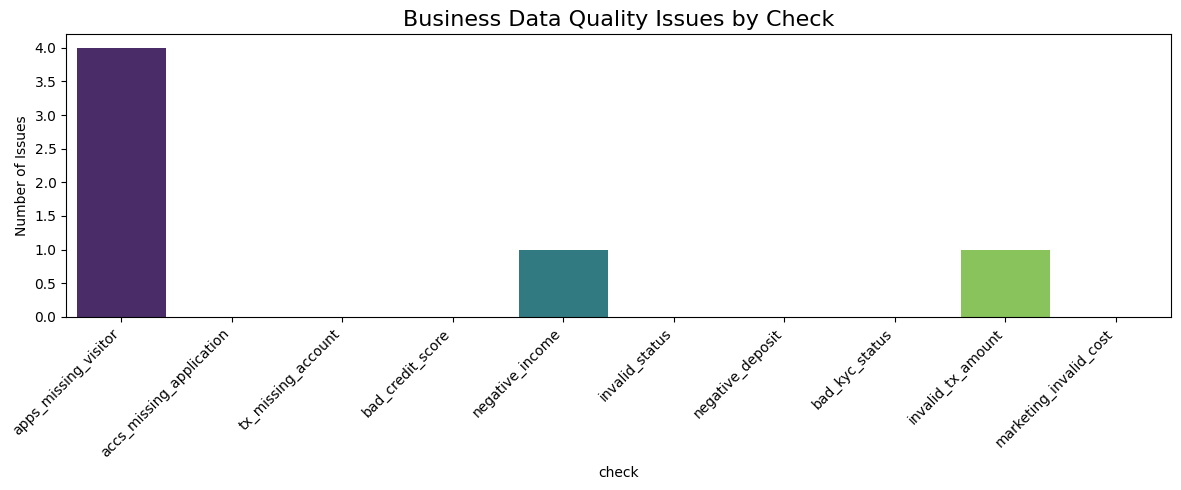

In [8]:
plt.figure(figsize=(12, 5))
sns.barplot(data=bdq_df, x="check", y="num_issues", palette="viridis")

plt.title("Business Data Quality Issues by Check", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Issues")
plt.tight_layout()
plt.show()


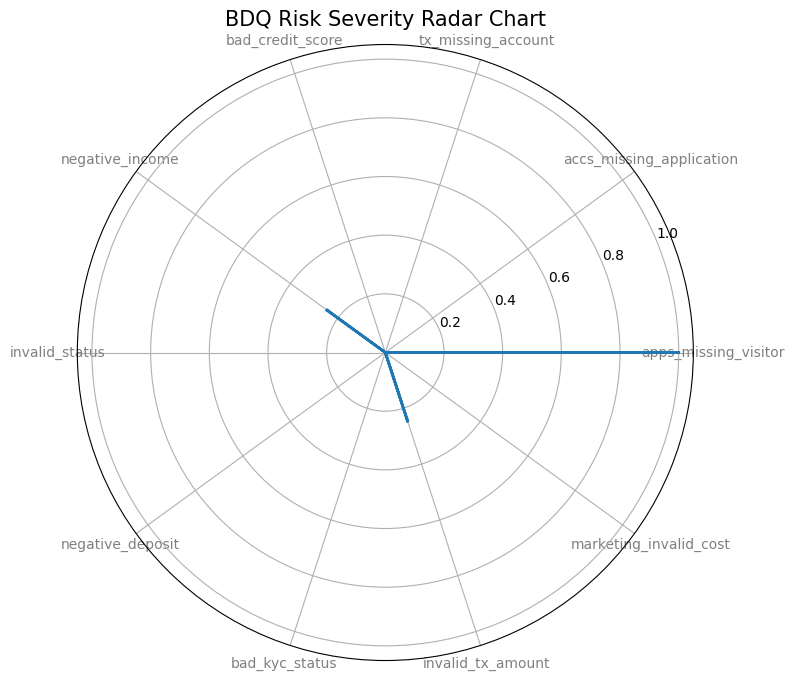

In [ ]:
from math import pi

df = bdq_df.copy()
df["severity"] = df["num_issues"] / df["num_issues"].max()  # normalized 0–1 scale

categories = list(df["check"])
values = list(df["severity"])
values += values[:1]  # repeat first value to close the radar chart

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.4)

plt.title("BDQ Risk Severity Radar Chart", size=15)
plt.show()


/var/folders/_s/p988zzpj033g3ff1h9gdc8qh0000gn/T/ipykernel_65471/197381577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel, x="Stage", y="Count", palette="coolwarm")


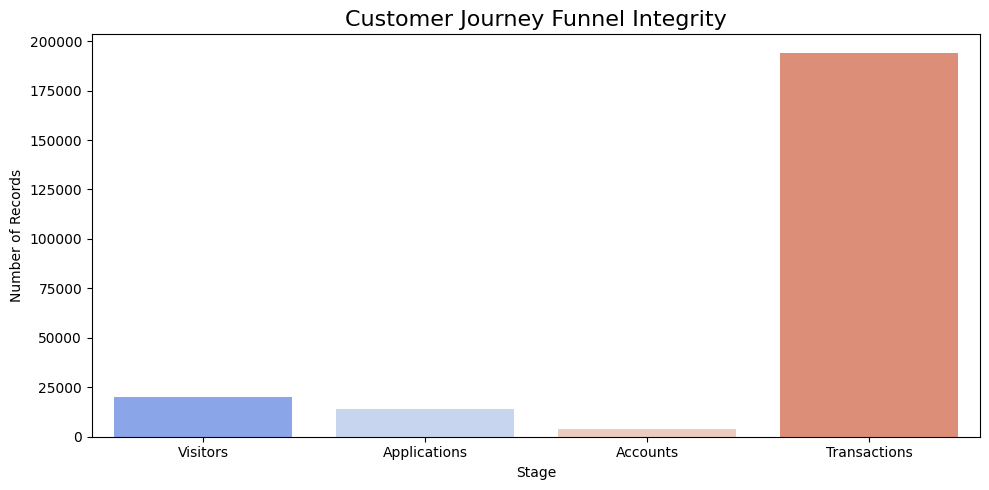

In [11]:
visitor = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_visitor_events.csv")
applications = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_applications.csv")
accounts = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_accounts.csv")
transactions = pd.read_csv("/Users/gritv/Desktop/projects /data/cleaned_transactions.csv")

funnel = pd.DataFrame({
    "Stage": ["Visitors", "Applications", "Accounts", "Transactions"],
    "Count": [
        visitor["visitor_id"].nunique(),
        applications["application_id"].nunique(),
        accounts["account_id"].nunique(),
        transactions["transaction_id"].nunique()
    ]
})

plt.figure(figsize=(10, 5))
sns.barplot(data=funnel, x="Stage", y="Count", palette="coolwarm")

plt.title("Customer Journey Funnel Integrity", fontsize=16)
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


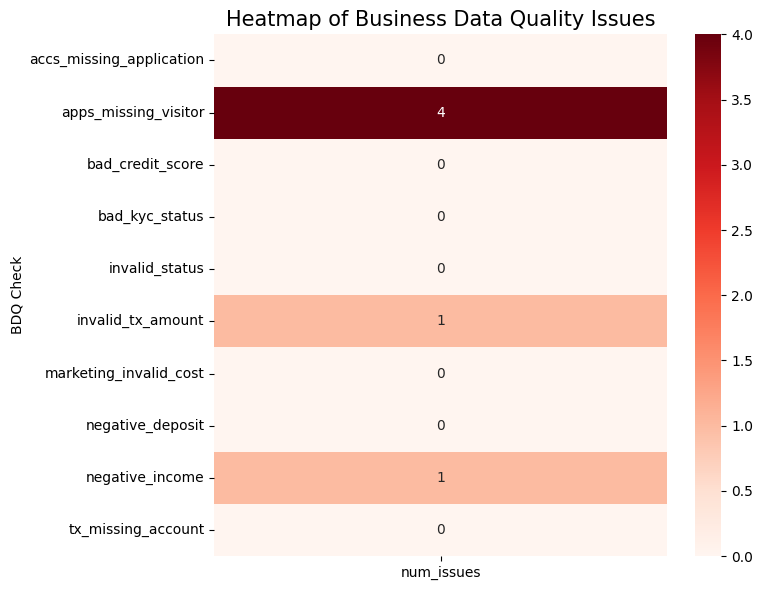

In [12]:
heat = bdq_df.pivot_table(index="check", values="num_issues")

plt.figure(figsize=(8, 6))
sns.heatmap(heat, cmap="Reds", annot=True, fmt="g")

plt.title("Heatmap of Business Data Quality Issues", fontsize=15)
plt.ylabel("BDQ Check")
plt.tight_layout()
plt.show()
